# Auswertung

## 1. Aufnahme des 'Sonnenspektrums'

[INTRO HERE]

(250, 850)

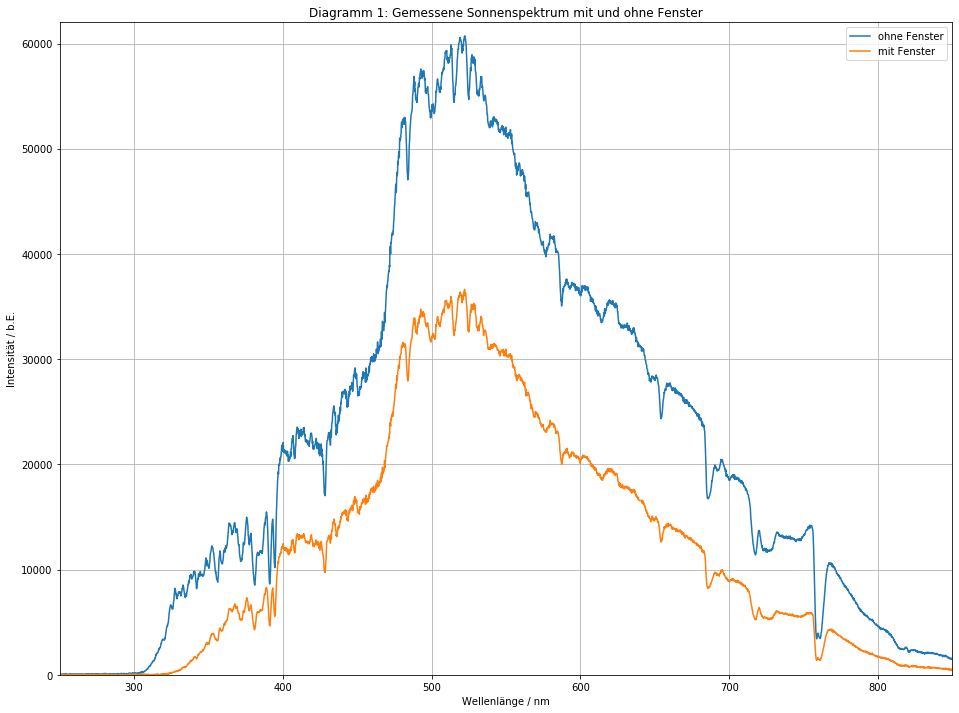

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

#Messung des Himmellichts ohne Glas
wl_og, int_og = np.loadtxt('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment%20234/Versuch%20234/Himmeloffen2.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)
#Messung des Himmellichts mit Glas
wl_mg, int_mg = np.loadtxt('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment%20234/Versuch%20234/Himmelgesch2.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

plt.figure(figsize=(16,12))
plt.plot(wl_og, int_og, label = 'ohne Fenster')
plt.plot(wl_mg, int_mg, label = 'mit Fenster')
plt.title('Diagramm 1: Gemessene Sonnenspektrum mit und ohne Fenster')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.legend()
plt.grid()
plt.ylim((0,62000))
plt.xlim((250,850))
#plt.savefig("figures/Himmel_m_o_G.pdf", format="pdf")

Die Absorption von Glas wurde durch der Formel
\begin{equation} A_{Glas} = 1 - \frac{I_{mG}(\lambda)}{I_{oG}(\lambda)} \tag{6} \end{equation}
berechnet, wobei $I_{mG}$ die gemessene Intensität mit und $I_{oG}$ ohne Fensterglas darstellen.<br>

Die Wellenlängen größer als 320 nm sind in dem folgenden Diagramm dargestellt.

(320, 800)

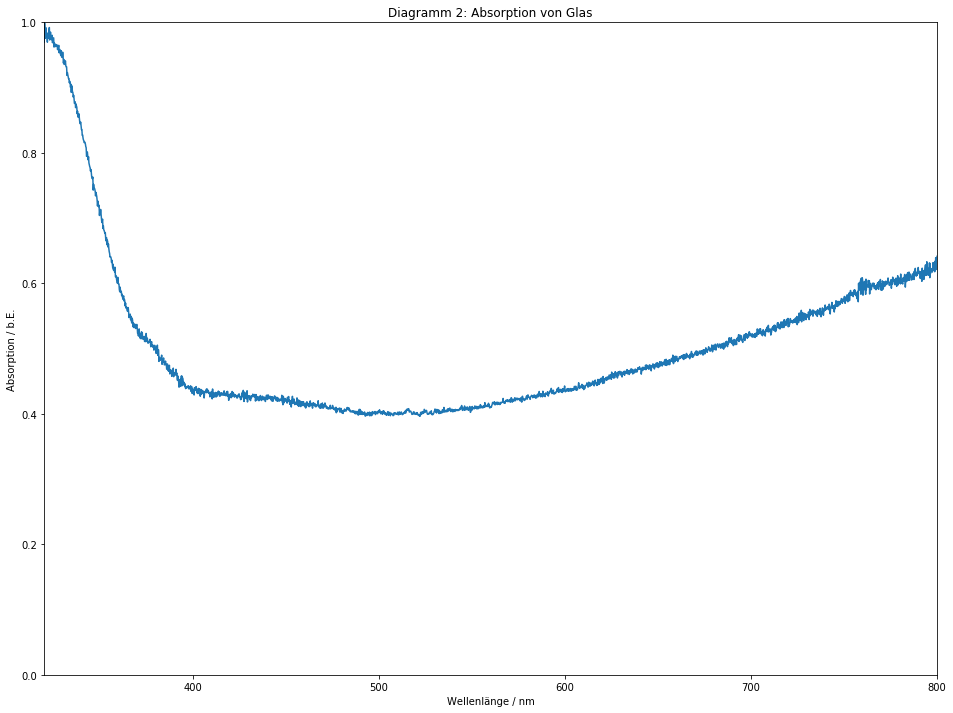

In [6]:
A = 1-int_mg/int_og

plt.figure(figsize=(16,12))
plt.plot(wl_mg, A)
plt.title('Diagramm 2: Absorption von Glas')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Absorption / b.E.')
plt.ylim((0,1))
plt.xlim((320,800))
#plt.savefig("figures/ABsorption_Glas.pdf", format="pdf")

[WAS ÜBER ABSORPTION VON GLAS]

<IPython.core.display.Javascript object>


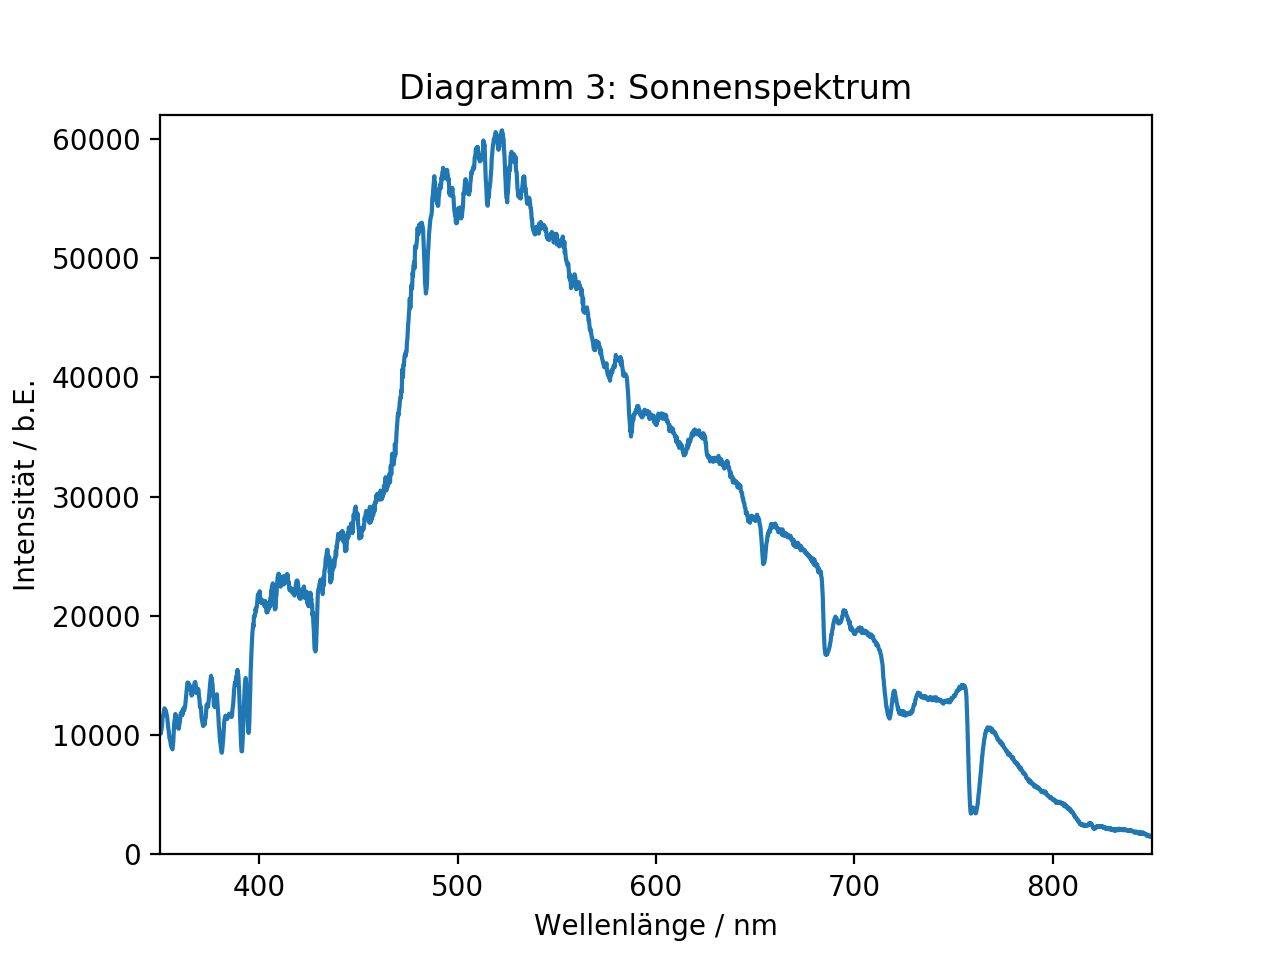

(350, 850)

In [9]:
%matplotlib notebook

#plt.figure(figsize=(16,12))
plt.plot(wl_og, int_og)
plt.title('Diagramm 3: Sonnenspektrum')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.ylim((0,62000))
plt.xlim((350,850))
#ple.savefig("figures/Fraunhofer.pdf", format="pdf")

## 2. Qualitativer Vergleich einfacher Lichtquellenspektren

## 3. Natriumspektrum